In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import re

In [ ]:
!pip install gdown

!rm -r dataset
!gdown "https://drive.google.com/uc?id=1GVXhMW072zp5tlQHeGKQDFsi0QJmBkWz" -O dataset.zip
!unzip dataset.zip -d dataset


rm: cannot remove 'dataset': No such file or directory
Downloading...
From: https://drive.google.com/uc?id=1GVXhMW072zp5tlQHeGKQDFsi0QJmBkWz
To: /content/dataset.zip
100% 894/894 [00:00<00:00, 4.19MB/s]
Archive:  dataset.zip
  inflating: dataset/Student Stress Factors (2).csv  


In [ ]:
import pandas as pd

file_path = "dataset/Student Stress Factors (2).csv"
try:
    data = pd.read_csv(file_path)
    print("Dataset successfully loaded!")
    print("\nDataset Preview:")
    print(data.head().T)

    print("\nDataset Info:")
    data.info()
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Dataset successfully loaded!

Dataset Preview:
                                                    0  1  2  3  4
Kindly Rate your Sleep Quality 😴                    3  4  2  3  2
How many times a week do you suffer headaches 🤕?    1  1  1  2  3
How would you rate you academic performance 👩‍🎓?    3  2  2  3  1
how would you rate your study load?                 4  3  1  2  5
How many times a week you practice extracurricu...  2  3  4  3  5
How would you rate your stress levels?              3  2  4  3  3

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 6 columns):
 #   Column                                                            Non-Null Count  Dtype
---  ------                                                            --------------  -----
 0   Kindly Rate your Sleep Quality 😴                                  520 non-null    int64
 1   How many times a week do you suffer headaches 🤕?                  520 non-null    int64


In [ ]:
duplicates = data.duplicated(keep=False).sum()
print(f"\nNumber of duplicate rows (based on all columns): {duplicates}")

if duplicates > 0:
    print("\nDuplicate Rows Detected (based on all columns):")
    duplicate_rows = data[data.duplicated(keep=False)]
    print(duplicate_rows)
else:
    print("No duplicate rows found.")


Number of duplicate rows (based on all columns): 520

Duplicate Rows Detected (based on all columns):
     Kindly Rate your Sleep Quality 😴  \
0                                   3   
1                                   4   
2                                   2   
3                                   3   
4                                   2   
..                                ...   
515                                 3   
516                                 2   
517                                 2   
518                                 3   
519                                 5   

     How many times a week do you suffer headaches 🤕?  \
0                                                   1   
1                                                   1   
2                                                   1   
3                                                   2   
4                                                   3   
..                                                ...   
515  

In [ ]:
data.columns = [re.sub(r'[^\w\s]', '', col) for col in data.columns]
data.columns = ["Sleep_Quality", "Headaches", "Academic_Performance", "Study_Load", "Extracurricular", "Stress_Levels"]
print(data.columns)

Index(['Sleep_Quality', 'Headaches', 'Academic_Performance', 'Study_Load',
       'Extracurricular', 'Stress_Levels'],
      dtype='object')


In [ ]:
X = data[["Sleep_Quality", "Headaches", "Academic_Performance", "Study_Load", "Extracurricular"]]
y = data["Stress_Levels"]
y_encoded = pd.get_dummies(y).values

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


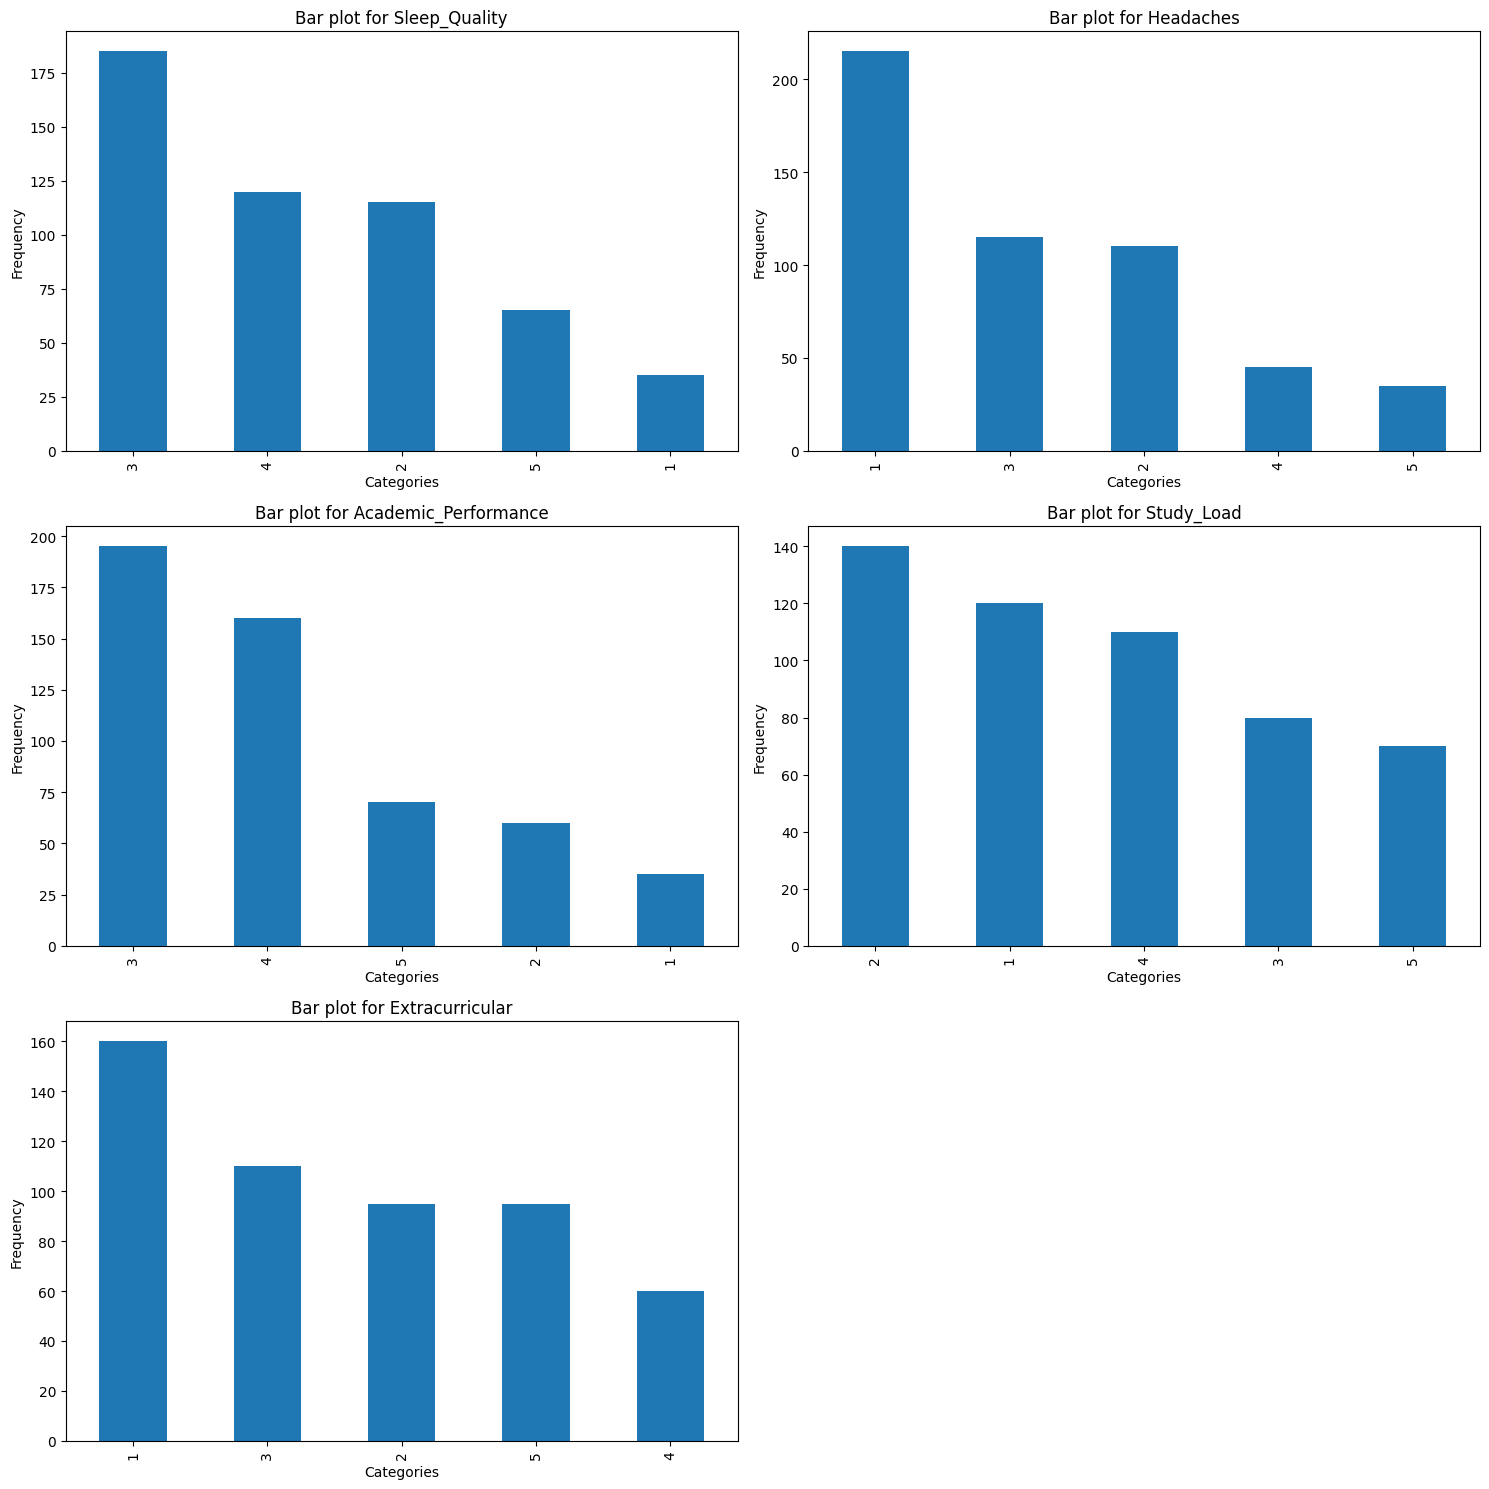

In [ ]:
categorical = ["Sleep_Quality", "Headaches", "Academic_Performance", "Study_Load", "Extracurricular"]

n = len(categorical)
ncols = 2
nrows = math.ceil(n / ncols)

fig, axs = plt.subplots(nrows, ncols, figsize=(15, nrows * 5))

for i, col in enumerate(categorical):
    r, c = i // ncols, i % ncols
    value_counts = data[col].value_counts()
    value_counts.plot(kind="bar", ax=axs[r, c])
    axs[r, c].set_title(f"Bar plot for {col}")
    axs[r, c].set_xlabel("Categories")
    axs[r, c].set_ylabel("Frequency")

if n % ncols != 0:
    for j in range(n, nrows * ncols):
        fig.delaxes(axs.flatten()[j])

plt.tight_layout()
plt.show()

In [ ]:
print(data.columns.tolist())


['Sleep_Quality', 'Headaches', 'Academic_Performance', 'Study_Load', 'Extracurricular', 'Stress_Levels']


In [ ]:
should_be_numerical = [
    'Sleep_Quality',
    'Headaches',
    'Academic_Performance',
    'Study_Load',
    'Extracurricular',
    'Stress_Levels',
]

data_fuels = data[should_be_numerical].apply(pd.to_numeric, errors="coerce")
print(data_fuels.nunique())

Sleep_Quality           5
Headaches               5
Academic_Performance    5
Study_Load              5
Extracurricular         5
Stress_Levels           5
dtype: int64


In [ ]:
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

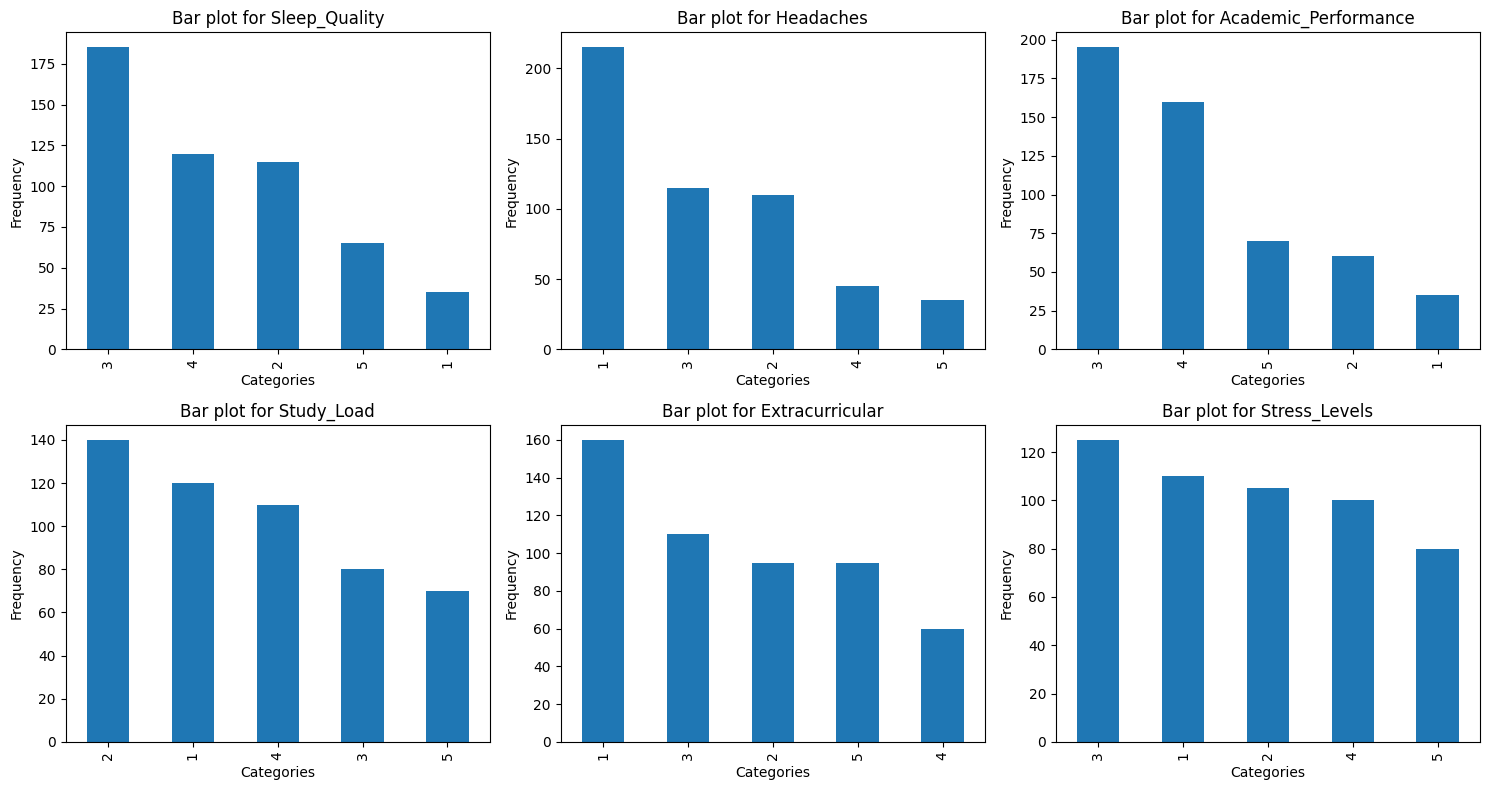

In [ ]:
def remove_numbers(text):
    if isinstance(text, str):
        return re.sub(r'\d+', '', text)
    return text

should_be_numerical = [
    'Sleep_Quality',
    'Headaches',
    'Academic_Performance',
    'Study_Load',
    'Extracurricular',
    'Stress_Levels',
]

data_fuels = data[should_be_numerical].apply(lambda col: col.map(remove_numbers))
columns = data_fuels.columns.to_list()

n = len(columns)
ncols = 3
nrows = math.ceil(n / ncols)
fig, axs = plt.subplots(nrows, ncols, figsize=(15, nrows * 4))

for i, col in enumerate(columns):
    r, c = i // ncols, i % ncols
    value_counts = data_fuels[col].value_counts()
    if nrows == 1:
        ax = axs[c]
    else:
        ax = axs[r, c]

    value_counts.plot(kind="bar", ax=ax)
    ax.set_title(f"Bar plot for {col}")
    ax.set_xlabel("Categories")
    ax.set_ylabel("Frequency")

if n % ncols != 0:
    for j in range(n, nrows * ncols):
        fig.delaxes(axs.flatten()[j])

plt.tight_layout()
plt.show()

In [ ]:
my_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(y_train.shape[1], activation='softmax')  # Output layer for multiclass
])

my_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = my_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.2736 - loss: 1.6325 - val_accuracy: 0.2262 - val_loss: 1.5953
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3904 - loss: 1.5149 - val_accuracy: 0.3333 - val_loss: 1.5286
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4339 - loss: 1.4538 - val_accuracy: 0.3095 - val_loss: 1.4846
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4339 - loss: 1.4071 - val_accuracy: 0.4048 - val_loss: 1.4502
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4713 - loss: 1.3610 - val_accuracy: 0.4167 - val_loss: 1.4174
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5392 - loss: 1.3174 - val_accuracy: 0.4286 - val_loss: 1.3892
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5819 - loss: 1.2498 - val_accuracy: 0.4524 - val_loss: 1.3593
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5787 - loss: 1.2233 - val_accuracy: 0.4524 - val_los

In [ ]:
test_loss, test_accuracy = my_model.evaluate(X_test, y_test, verbose=1)

# Menampilkan akurasi
print(f"Test Accuracy: {test_accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7336 - loss: 0.5692 
Test Accuracy: 0.7115


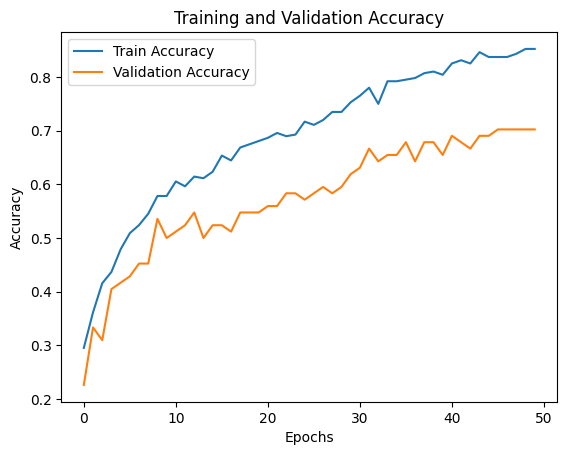

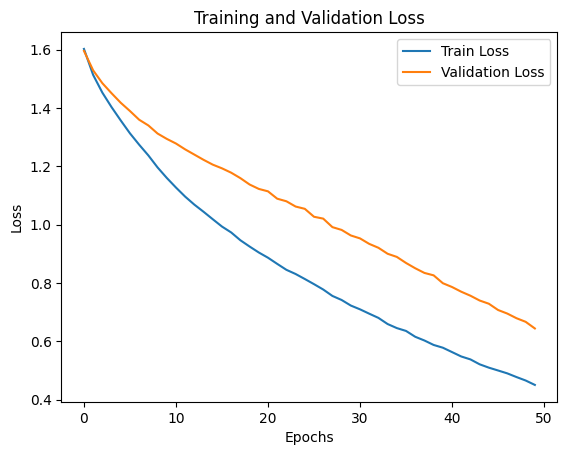

In [ ]:
# Plot akurasi
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


--- Stress Level Prediction ---
Rate your sleep quality (1-5): 2
How often do you experience headaches (1-5): 2
Rate your academic performance (1-5): 3
Rate your study load (1-5): 4
How many times a week do you engage in extracurricular activities (1-5): 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

Predicted Stress Level: 3 (Probabilities: [1.2295745e-02 6.3522067e-03 9.0778601e-01 7.2997138e-02 5.6892127e-04])

Your stress level category: Moderate Stress
Moderate stress level. Try relaxation techniques or reduce your workload.


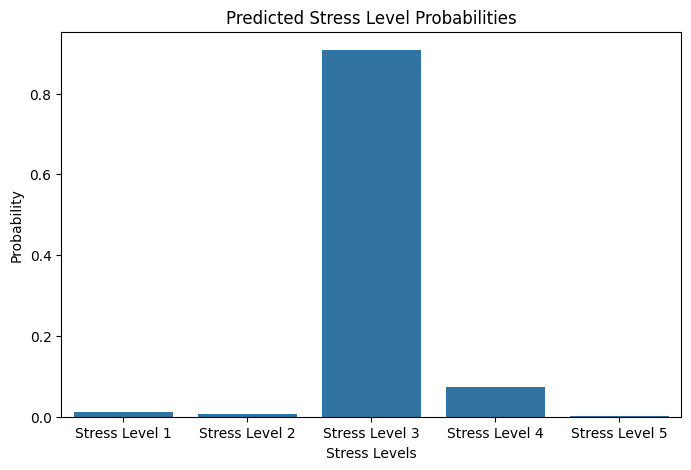

In [ ]:
print("\n--- Stress Level Prediction ---")

# Function to validate input range
def check_input_validity(input_value, min_value=1, max_value=5):
    if not (min_value <= input_value <= max_value):
        raise ValueError(f"Input {input_value} is out of range. Please enter a value between {min_value} and {max_value}.")
    return input_value

try:
    # Collect user input
    sleep_rating = check_input_validity(int(input("Rate your sleep quality (1-5): ")))
    headache_freq = check_input_validity(int(input("How often do you experience headaches (1-5): ")))
    academic_performance = check_input_validity(int(input("Rate your academic performance (1-5): ")))
    study_intensity = check_input_validity(int(input("Rate your study load (1-5): ")))
    extracurricular_activity = check_input_validity(int(input("How many times a week do you engage in extracurricular activities (1-5): ")))

    # Prepare input data and scale it
    user_data = pd.DataFrame([{
        "Sleep_Quality": sleep_rating,
        "Headaches": headache_freq,
        "Academic_Performance": academic_performance,
        "Study_Load": study_intensity,
        "Extracurricular": extracurricular_activity
    }])
    user_data_scaled = scaler.transform(user_data)

    # Make stress level prediction
    stress_probabilities = my_model.predict(user_data_scaled)
    predicted_stress_level = stress_probabilities.argmax() + 1  # Convert index to stress level class
    print(f"\nPredicted Stress Level: {predicted_stress_level} (Probabilities: {stress_probabilities[0]})")

    # Mapping stress levels to categories
    stress_levels = {
        1: "Very Low Stress",
        2: "Low Stress",
        3: "Moderate Stress",
        4: "High Stress",
        5: "Very High Stress"
    }

    # Display stress category
    print(f"\nYour stress level category: {stress_levels[predicted_stress_level]}")

    # Provide recommendations
    advice = {
        1: "Great! You're in good shape. Keep maintaining your healthy lifestyle.",
        2: "You may feel slightly burdened. Take small steps to prevent stress from increasing.",
        3: "Moderate stress level. Try relaxation techniques or reduce your workload.",
        4: "Stress is fairly high. Take actions to mitigate it.",
        5: "Stress level is very high. Seek professional help as soon as possible."
    }
    print(advice[predicted_stress_level])

    # Plotting the stress probabilities
    stress_labels = [f"Stress Level {i+1}" for i in range(stress_probabilities.shape[1])]
    plt.figure(figsize=(8, 5))
    sns.barplot(x=stress_labels, y=stress_probabilities[0])
    plt.title('Predicted Stress Level Probabilities')
    plt.xlabel('Stress Levels')
    plt.ylabel('Probability')
    plt.show()

except Exception as error:
    print(f"Error: {error}")

In [ ]:
my_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,889 (30.82 KB)

 Trainable params: 2,629 (10.27 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,260 (20.55 KB)

In [ ]:
my_model.save('my_model.h5')


In [ ]:
my_model.save('my_model.keras')